## [All About Algos](https://pmorissette.github.io/bt/algos.html)


### Algo & AlgoStack
- Algo와 AlgoStack은 bt의 핵심 구성 요소

    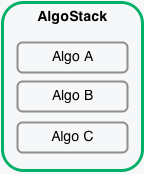

- Algo는 True 또는 False를 반환하는 `함수`로 하나의 특정 목적으로 사용되어야한다.
- AlgoStack은 `클래스`로 여러 Algo로 구성된다.
- AlgoStack은 필요에 따라 다른 AlgoStack에 포함 될 수 있다.

### Data Passing
- 서로다른 Algo 간에 데이터를 공유하기 위해서 Strategy는 temp(임시)와 perm(영구) 데이터를 가져야 한다.

### Branching and Control Flow

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
import bt
from bt import AlgoStack, Backtest, Strategy
from bt.algos import (
    Or,
    PrintInfo,
    Rebalance,
    RunMonthly,
    RunWeekly,
    SelectAll,
    WeighEqually,
)

data = bt.get("syp, agg", start="2010-01-01", end="2017-01-01")

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# fmt: off
# 2개의 AlgoStack을 같이 실행시킬 수 있다.
strategy = Strategy(
    name="strategy",
    algos=[
        Or(
            [
                AlgoStack(
                    RunWeekly(),
                    PrintInfo("{name}:{now} - Value:{_value:0.0f} - Price:{_price:0.4f}"),
                ),
                AlgoStack(
                    RunMonthly(),
                    SelectAll(),
                    WeighEqually(),
                    Rebalance()
                ),
            ]
        )
    ],
    children=["spy", "agg"],
)

strategy:2010-01-04 00:00:00 - Value:1000000 - Price:100.0000
strategy:2010-01-11 00:00:00 - Value:1002613 - Price:100.2613
strategy:2010-01-20 00:00:00 - Value:1010260 - Price:101.0260
strategy:2010-01-25 00:00:00 - Value:1011034 - Price:101.1034
strategy:2010-02-01 00:00:00 - Value:1011582 - Price:101.1582
strategy:2010-02-08 00:00:00 - Value:1015660 - Price:101.5660
strategy:2010-02-16 00:00:00 - Value:1012552 - Price:101.2552
strategy:2010-02-22 00:00:00 - Value:1008086 - Price:100.8086
strategy:2010-03-01 00:00:00 - Value:1016471 - Price:101.6471
strategy:2010-03-08 00:00:00 - Value:1017444 - Price:101.7444
strategy:2010-03-15 00:00:00 - Value:1019294 - Price:101.9294
strategy:2010-03-22 00:00:00 - Value:1021048 - Price:102.1048
strategy:2010-03-29 00:00:00 - Value:1013938 - Price:101.3938
strategy:2010-04-06 00:00:00 - Value:1009548 - Price:100.9548
strategy:2010-04-12 00:00:00 - Value:1016289 - Price:101.6289
strategy:2010-04-19 00:00:00 - Value:1018341 - Price:101.8341
strategy

<Axes: title={'center': 'Equity Progression'}>

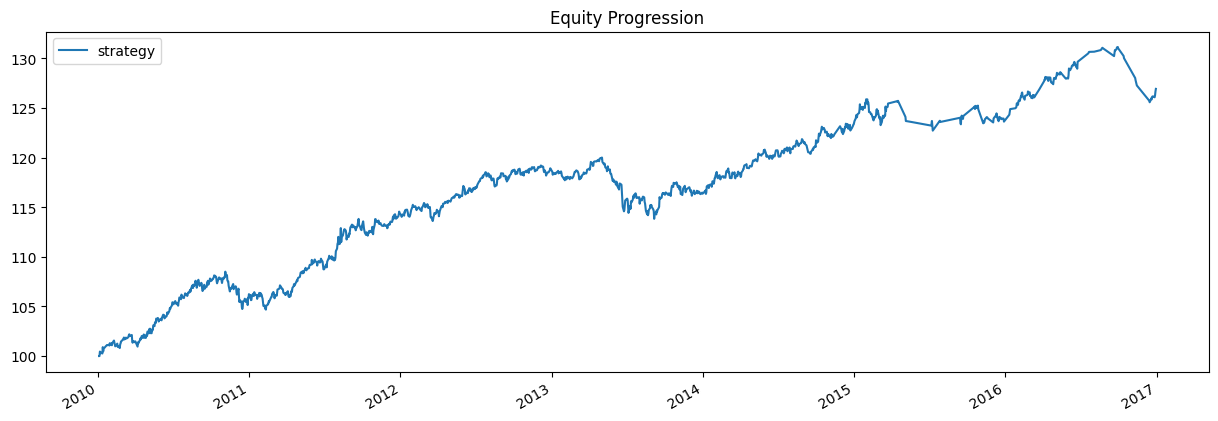

In [4]:
backtest = Backtest(strategy, data)
result = bt.run(backtest)
result.plot()

In [5]:
result.prices

,strategy
2010-01-03,100.000000
2010-01-04,100.000000
2010-01-05,100.454878
2010-01-06,100.396837
2010-01-07,100.280690
...,...
2016-12-23,126.175579
2016-12-27,126.081639
2016-12-28,126.281285
2016-12-29,126.668919
